In [9]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import powerlaw

np.random.seed(42)
plt.style.use('../style.mpl')

In [2]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 1139 nodes and 17908 edges


In [6]:
degree_centrality = nx.degree_centrality(G)
weighted_degree_centrality = dict(G.degree(weight='weight'))
closeness_centrality =  nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


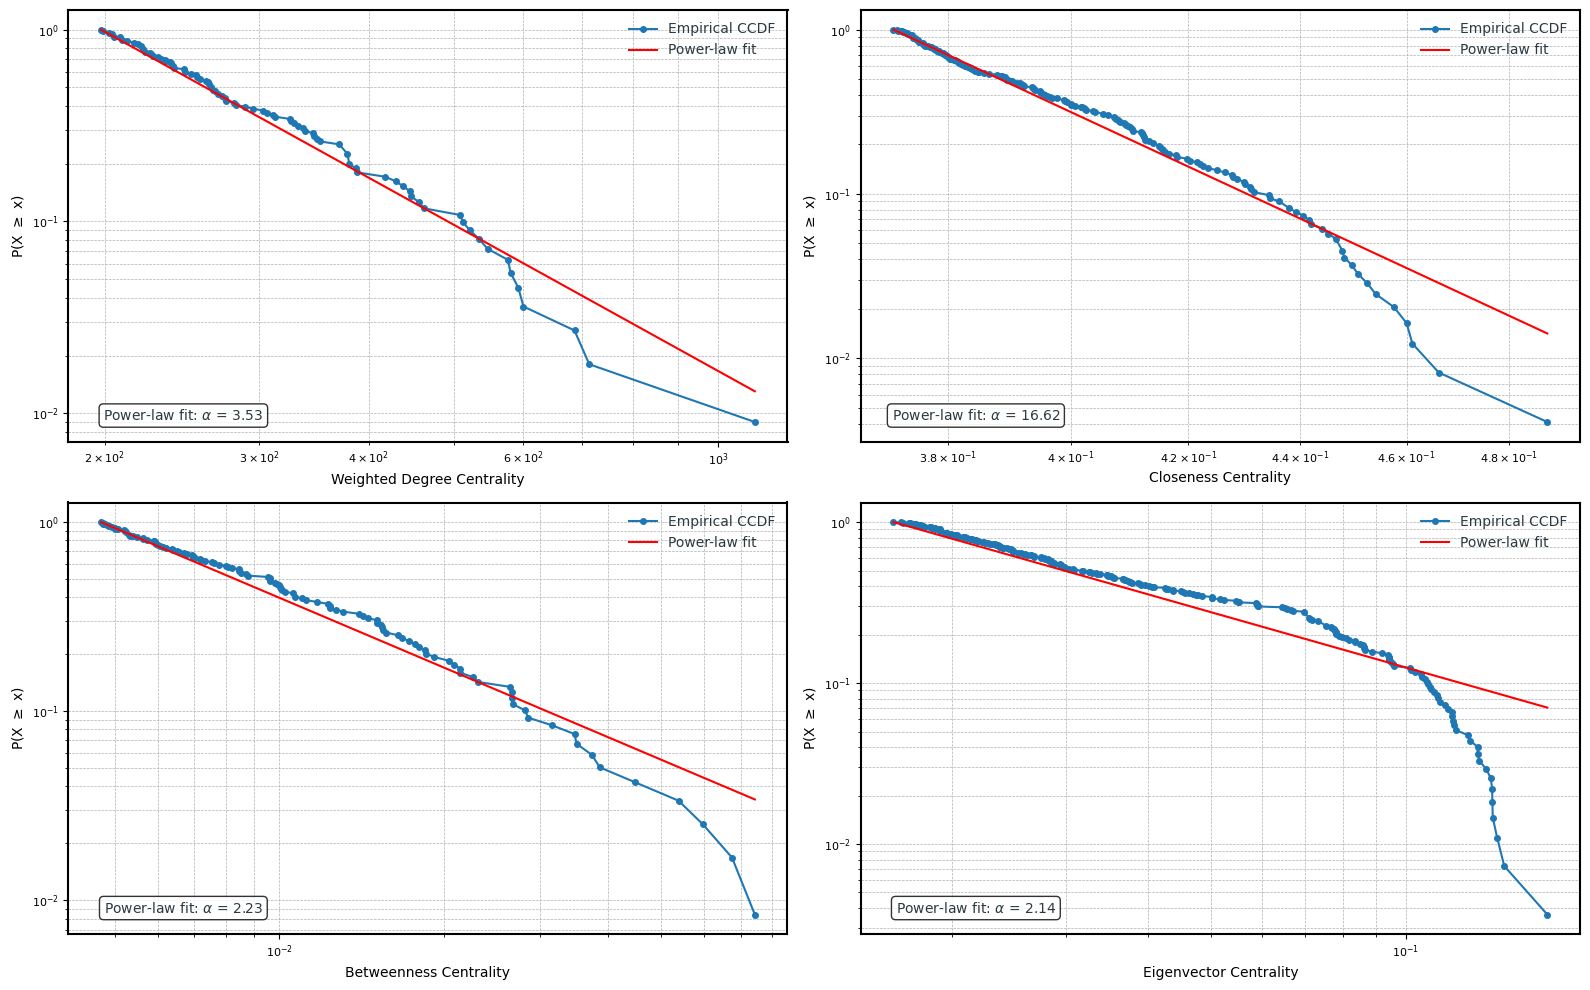

In [62]:
centralities = {
    'Weighted Degree Centrality': weighted_degree_centrality,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for ax, (title, centrality_dict) in zip(axes, centralities.items()):
    values = np.array(list(centrality_dict.values()))
    
    fit = powerlaw.Fit(values, discrete=False)
    alpha = fit.power_law.alpha
    
    fit.plot_ccdf(ax=ax, label='Empirical CCDF', marker='o', markersize=4)
    fit.power_law.plot_ccdf(ax=ax, linestyle='-', label='Power-law fit', color='red')
    
    ax.set_xlabel(title)
    ax.set_ylabel(r'P(X $\geq$ x)')
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    ax.legend()
    
    ax.text(
        0.16, 0.05,
        rf'Power-law fit: $\alpha$ = {alpha:.2f}',
        transform=ax.transAxes,
        ha='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

plt.tight_layout()
plt.savefig('../plots/power-law.png', transparent=True)
plt.show()